# Data anaylsis

### Importing libraries

In [313]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [314]:
colors_image_formats= ["#F6511D", "#3B8EA5","#7FB800","#9e73ff"]
color_browsers = ["#EE6352","#59CD90","#3fa7d6","#FAC05E","#F79D84","#5e5e5e"]

## Aggregate data

In [315]:
folder_path = "./raw_data/websites/"
df_combined = pd.DataFrame()
file_list = os.listdir(folder_path)
column_names = ["run_id","browser","image_format","FCP","TTFB","PLT","fetch_time"]

df_csv_concat = pd.concat([pd.read_csv(folder_path + file, names=column_names) for file in file_list], ignore_index=True)
df_csv_concat = df_csv_concat.sort_values(["run_id"])
df_csv_concat.to_csv("combined_website_performance_data.csv",index=False)

# Visualization of data

### Metric Boxplot per Image_format 

In [316]:
def visualize_metrix_boxplot_by_image_format(metric):
    df = pd.read_csv("combined_website_performance_data.csv")
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, hue="browser",palette=color_browsers)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()

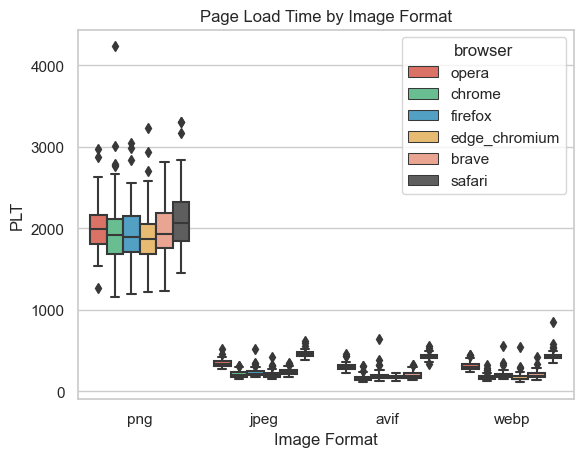

In [317]:
visualize_metrix_boxplot_by_image_format("PLT")

### Boxplot per metric and BROWSER

In [318]:
def boxplot_per_metric_and_browser(metric,browser):
    df = pd.read_csv("combined_website_performance_data.csv")
    df = df[df["browser"]==browser]
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, palette=colors_image_formats)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()

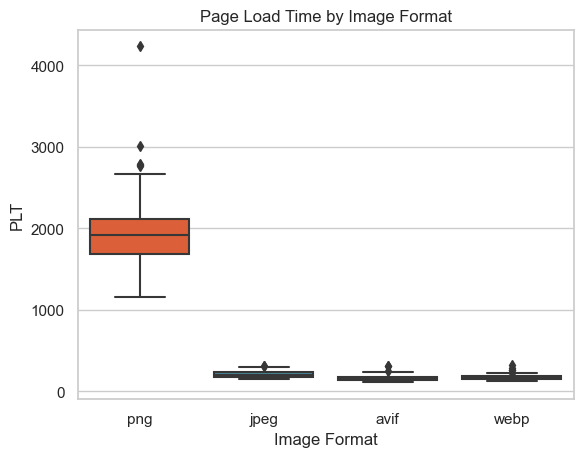

In [319]:
boxplot_per_metric_and_browser('PLT', 'chrome')

### Boxplot per metric and IMAGE_FORMAT

In [320]:
def boxplot_per_metric_and_browser(metric,image_formats):
    df = pd.read_csv("combined_website_performance_data.csv")
    df = df[df["image_format"].isin(image_formats)]
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="browser", y=metric, hue="image_format", palette="Set1")
    plt.xlabel("Browser")
    plt.ylabel(metric)  
    plt.show()

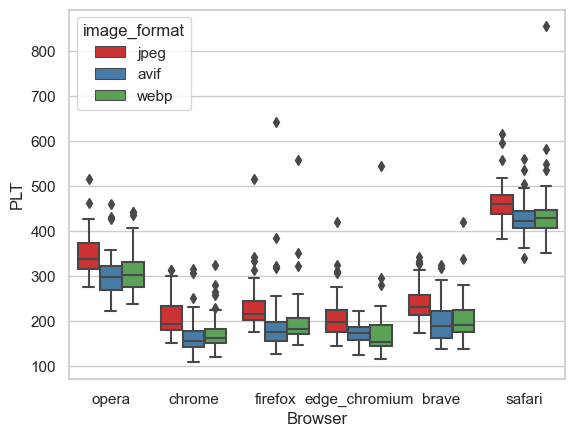

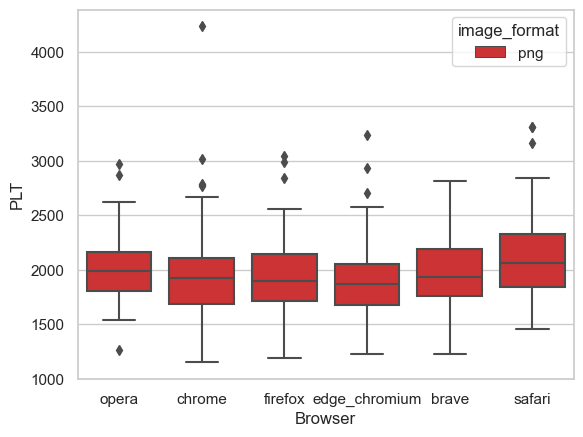

In [321]:
boxplot_per_metric_and_browser("PLT",["jpeg","avif","webp"])
boxplot_per_metric_and_browser("PLT",["png"])

## Combine PLT per Browser and Image Format

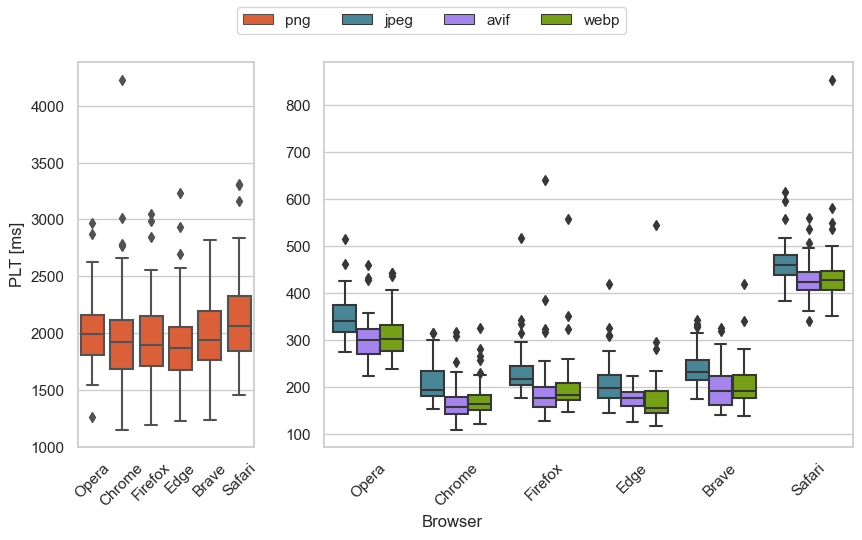

In [322]:
colors_image_formats= ["#F6511D", "#3B8EA5","#9e73ff","#7FB800"]

df = pd.read_csv("combined_website_performance_data.csv")
fig, axes = plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [1, 3]})
fig.text(0.5, -0.05, 'Browser', ha='center')

sns.set(style="whitegrid")
df_left = df[df["image_format"].isin(["png"])]
ax = sns.boxplot(ax=axes[0], data=df_left, x="browser", y="PLT", palette=colors_image_formats[0:1], hue="image_format",saturation=0.75,)
ax.set_ylabel("PLT [ms]")
ax.set_xticklabels(["Opera", "Chrome", "Firefox", "Edge", "Brave","Safari"], rotation=45)
ax.set_xlabel("")
ax.legend([],[], frameon=False)


df_right = df[df["image_format"].isin(["jpeg","avif","webp"])]
ax2 = sns.boxplot(ax=axes[1], data=df_right, x="browser", y="PLT", hue="image_format", palette=colors_image_formats[1:4],saturation=0.75,)
ax2.set_xticklabels(["Opera", "Chrome", "Firefox", "Edge", "Brave","Safari"], rotation=45)
ax2.legend([],[], frameon=False)
ax2.set_xlabel("")
ax2.set_ylabel("")

lines = []
labels = []
counter = 0

for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    lines.extend(Line)
    labels.extend(Label)
  
# rotating x-axis labels of last sub-plot
plt.xticks(rotation=45)
  
fig.legend(lines, labels, loc='upper center', ncol=4, fancybox=True)
plt.show()


One-Way-Anova between image formats per Browser

In [323]:
# One-Way Anova for one browser and image format
metric = "PLT"
df = pd.read_csv("combined_website_performance_data.csv")
size = 60

browsers = ["opera","chrome","firefox","edge_chromium","brave","safari"]
image_formats = ["png","jpeg","webp","avif"]

for browser in browsers:
    df_browser = df[df["browser"] == browser]
    png = df_browser[df_browser["image_format"] == "png"].sample(n=size, random_state=1)
    jpg = df_browser[df_browser["image_format"] == "jpeg"]
    webp = df_browser[df_browser["image_format"] == "webp"]
    avif = df_browser[df_browser["image_format"] == "avif"]
    
    print("Browser: ", browser)
    print(stats.f_oneway(png[metric], jpg[metric], webp[metric], avif[metric]))

    # f_oneway returns F-statistic and p-value
    print("- PNG: ", stats.normaltest(png[metric]))
    print("- JPG: ", stats.normaltest(jpg[metric]))
    print("- WEBP: ", stats.normaltest(webp[metric]))
    print("- AVIF: ", stats.normaltest(avif[metric]))   
    # print mean and Q1 and Q3
    print("-- PNG: (Q1: ", np.quantile(png[metric], 0.25), ", mean: ", np.median(png[metric]), ", Q3: ", np.quantile(png[metric], 0.75), ")")
    print("-- JPG: (Q1: ", np.quantile(jpg[metric], 0.25), ", mean: ", np.median(jpg[metric]), ", Q3: ", np.quantile(jpg[metric], 0.75), ")")
    print("-- WEBP: (Q1: ", np.quantile(webp[metric], 0.25), ", mean: ", np.median(webp[metric]), ", Q3: ", np.quantile(webp[metric], 0.75), ")")
    print("-- AVIF: (Q1: ", np.quantile(avif[metric], 0.25), ", mean: ", np.median(avif[metric]), ", Q3: ", np.quantile(avif[metric], 0.75), ")")
    



Browser:  opera
F_onewayResult(statistic=1732.00077684904, pvalue=2.313066366241263e-167)
- PNG:  NormaltestResult(statistic=5.597559291312072, pvalue=0.06088431774886527)
- JPG:  NormaltestResult(statistic=19.97298395512278, pvalue=4.6017353732602986e-05)
- WEBP:  NormaltestResult(statistic=13.503547514344657, pvalue=0.00116880460549653)
- AVIF:  NormaltestResult(statistic=22.584437057248998, pvalue=1.2469579389602155e-05)
-- PNG: (Q1:  1816.75 , mean:  2000.5 , Q3:  2165.0 )
-- JPG: (Q1:  316.0 , mean:  339.0 , Q3:  373.0 )
-- WEBP: (Q1:  277.0 , mean:  302.0 , Q3:  331.0 )
-- AVIF: (Q1:  269.0 , mean:  299.0 , Q3:  323.0 )
Browser:  chrome
F_onewayResult(statistic=916.8380203177385, pvalue=6.872243908711539e-135)
- PNG:  NormaltestResult(statistic=40.79083923668526, pvalue=1.387975511064643e-09)
- JPG:  NormaltestResult(statistic=13.431489187607927, pvalue=0.0012116834639494323)
- WEBP:  NormaltestResult(statistic=38.92767757814288, pvalue=3.523402168174431e-09)
- AVIF:  NormaltestR

# Two way Anova

model = ols('PLT ~ C(browser) + C(image_format) + C(browser):C(image_format)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

In [324]:
df = pd.read_csv("combined_website_performance_data.csv")

model = ols('PLT ~ C(browser) + C(image_format) + C(browser):C(image_format)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

# https://www.statology.org/two-way-anova-python/ 
# Both image_format and browser are significant and not depend 

,sum_sq,df,F,PR(>F)
C(browser),1.172953e+07,5.0,63.615303,1.954867e-60
C(image_format),8.834939e+08,3.0,7986.070698,0.000000e+00
C(browser):C(image_format),4.817764e+05,15.0,0.870974,5.973296e-01
Residual,5.660536e+07,1535.0,NaN,NaN
